# Car price prediction using regression techniques

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('otomoto_price_prediction_data.csv')
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [2]:
df.shape

(206207, 11)

In [3]:
df.columns

Index(['make', 'model', 'vehicle_year', 'mileage', 'engine_capacity',
       'engine_power', 'gearbox', 'fuel_type', 'damaged', 'is_business',
       'target_price'],
      dtype='object')

### checking the no of missing rows in each colum

In [4]:
df.isna().sum()

make                  0
model                 0
vehicle_year          0
mileage            1354
engine_capacity    2178
engine_power       1579
gearbox            1365
fuel_type             0
damaged               0
is_business           0
target_price          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206207 entries, 0 to 206206
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   make             206207 non-null  object 
 1   model            206207 non-null  object 
 2   vehicle_year     206207 non-null  int64  
 3   mileage          204853 non-null  float64
 4   engine_capacity  204029 non-null  float64
 5   engine_power     204628 non-null  float64
 6   gearbox          204842 non-null  object 
 7   fuel_type        206207 non-null  object 
 8   damaged          206207 non-null  int64  
 9   is_business      206207 non-null  int64  
 10  target_price     206207 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ MB


### Filling the missing values with the mean of the variable

In [6]:
df['mileage'].fillna(value=df['mileage'].mean(),inplace=True)
df['engine_capacity'].fillna(value=df['engine_capacity'].mean(),inplace=True)
df['engine_power'].fillna(value=df['engine_power'].mean(),inplace=True)

In [7]:
df.isna().sum()

make                  0
model                 0
vehicle_year          0
mileage               0
engine_capacity       0
engine_power          0
gearbox            1365
fuel_type             0
damaged               0
is_business           0
target_price          0
dtype: int64

### Filling the missing values with mode

In [8]:
df['gearbox'].mode()

0    manual
dtype: object

In [9]:
df['gearbox'].fillna('manual',inplace=True)

In [10]:
df['gearbox'].isna().sum()

0

# Data Visuslization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [12]:
# df.sort_values(by='target_price',ascending=False,inplace=True)
# df.head()


## Top Car's with the highest price

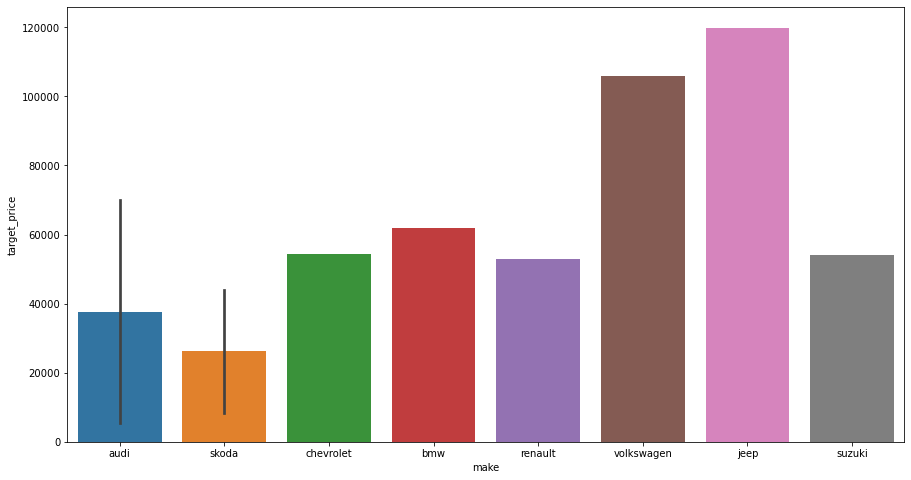

In [13]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df.make.head(10), y=df.target_price.head(10), data=df,)


In [14]:
df.tail()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
206202,mercedes-benz,klasa-b,2018,18000.0,1991.0,211.0,automatic,petrol,0,1,89900.0
206203,honda,jazz,2020,2700.0,1498.0,97.0,automatic,hybrid,0,1,94900.0
206204,mitsubishi,l200,2015,225000.0,2477.0,178.0,manual,diesel,0,1,69900.0
206205,volkswagen,transporter,2006,232000.0,1900.0,105.0,manual,diesel,0,0,29900.0
206206,volkswagen,passat,2012,204000.0,1968.0,140.0,manual,diesel,0,1,30900.0


## Car's with the lowest price

<AxesSubplot:xlabel='make', ylabel='target_price'>

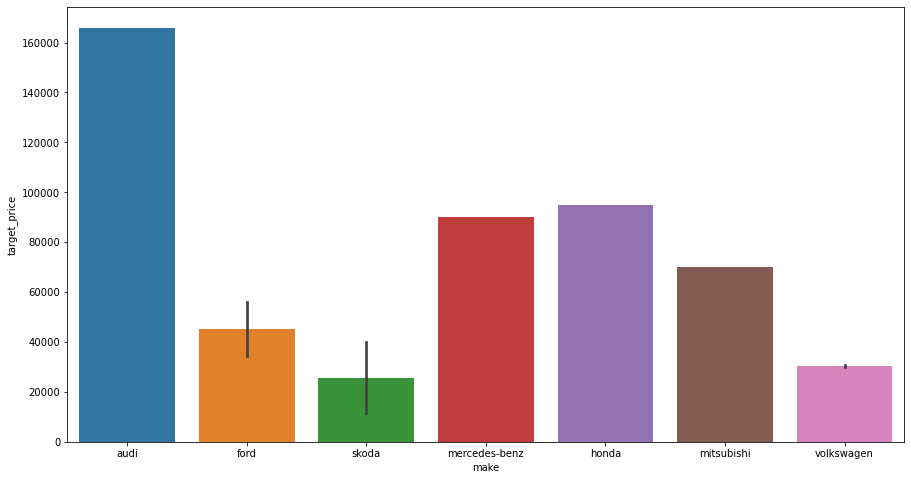

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.make.tail(10), y=df.target_price.tail(10), data=df)

## Pie chart describing car and it's specs 

In [50]:
# plt.figure(figsize=(15,8))
# import plotly.express as px   
# fig = px.pie(df,values='target_price', names='make',hover_data=['model','vehicle_year', 'mileage',],title='Cars') 
# fig.update_traces(textposition='inside', textinfo='percent+label',)
# fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
# fig.show()

# Label Encoding to convert categorical to numerical

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['make'] = le.fit_transform(df['make'])
df['model'] = le.fit_transform(df['model'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])

In [18]:
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,6,174,2013,153817.0,1984.0,180.0,1,4,0,0,69900.0
1,84,463,2004,115000.0,1390.0,75.0,7,4,0,1,8299.0
2,17,290,2012,299000.0,3600.0,323.0,1,4,0,1,54500.0
3,11,918,2013,155000.0,1995.0,163.0,1,0,0,0,62000.0
4,76,1003,2017,167000.0,1600.0,130.0,1,0,0,1,52999.0


### Selecting feature and target variable

In [19]:
Y = df['target_price']
X=df.iloc[:,:-1]

In [20]:
X.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business
0,6,174,2013,153817.0,1984.0,180.0,1,4,0,0
1,84,463,2004,115000.0,1390.0,75.0,7,4,0,1
2,17,290,2012,299000.0,3600.0,323.0,1,4,0,1
3,11,918,2013,155000.0,1995.0,163.0,1,0,0,0
4,76,1003,2017,167000.0,1600.0,130.0,1,0,0,1


In [21]:
Y.head()

0    69900.0
1     8299.0
2    54500.0
3    62000.0
4    52999.0
Name: target_price, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
X

array([[0.05607477, 0.14948454, 0.92307692, ..., 0.66666667, 0.        ,
        0.        ],
       [0.78504673, 0.39776632, 0.83653846, ..., 0.66666667, 0.        ,
        1.        ],
       [0.1588785 , 0.24914089, 0.91346154, ..., 0.66666667, 0.        ,
        1.        ],
       ...,
       [0.57009346, 0.54467354, 0.94230769, ..., 0.        , 0.        ,
        1.        ],
       [0.93457944, 0.89862543, 0.85576923, ..., 0.        , 0.        ,
        0.        ],
       [0.93457944, 0.66237113, 0.91346154, ..., 0.        , 0.        ,
        1.        ]])

# Model Development

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [26]:
prediction = regressor.predict(x_test)
prediction

array([96766.01923171, 20751.56643582, 84536.28078724, ...,
       68134.52017209, 12634.79430665, 98888.12759177])

In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_test,prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R2-score: 0.58
Root Mean Squared Error: 55302.0808153983


# RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=400, random_state=42)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=400, random_state=42)

In [29]:
rf_prediction = rf_regressor.predict(x_test)

# Performance Metrics

In [30]:
print("R2-score: %.2f" % r2_score(y_test,rf_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_prediction))  

R2-score: 0.91
Root Mean Squared Error: 26190.70273784733
Mean Absolute Error: 7746.141920552511
Mean Squared Error: 685952909.9022835


# xgboost regressor

In [32]:
import xgboost
classifier=xgboost.XGBRegressor()

In [33]:
import xgboost
regressor=xgboost.XGBRegressor()

In [34]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [35]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [36]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [37]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 27.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 59.9min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 102.3min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [38]:

random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
random_cv.best_params_

{'n_estimators': 900,
 'min_child_weight': 4,
 'max_depth': 15,
 'learning_rate': 0.05,
 'booster': 'gbtree',
 'base_score': 0.5}

In [42]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=np.nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgb_regressor_prediction = regressor.predict(x_test)

In [45]:
xgb_regressor_prediction

array([80618.836, 11547.765, 86659.734, ..., 45701.215, 10489.866,
       97005.19 ], dtype=float32)

## Performance Metrics for xgboost regressor

In [46]:
print("R2-score: %.2f" % r2_score(y_test,xgb_regressor_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_regressor_prediction)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_regressor_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_regressor_prediction))  

R2-score: 0.91
Root Mean Squared Error: 24895.232812065104
Mean Absolute Error: 7469.6741106561385
Mean Squared Error: 619772616.766923
